# NFL Match Data - Super Bowl History

## Notebook Setup

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
df = pd.read_csv("Data/processed_game_history.csv", parse_dates=["Date"], dtype={"season": int})
df = df.drop(["Unnamed: 0", "AtHome"], axis=1)

In [3]:
sb_games = df[df["Week"] == "Super Bowl"]
sb_games = sb_games.drop("Week", axis=1)
sb_games = sb_games.sort_values(by="Season", ascending=True)

In [ ]:
sb_count = len(sb_games)
sb_games["PtsTotal"] = sb_games["PtsW"] + sb_games["PtsL"]
sb_games["YdsTotal"] = sb_games["YdsW"] + sb_games["YdsL"]

## Insights

In [4]:
print(f"Number of Super Bowl games that have been played: {sb_games.shape[0]}")
print(f"Number of Super Bowls played in January: {len(sb_games[sb_games['Date'].dt.month == 1])}")
print(f"Number of Super Bowls played in February: {len(sb_games[sb_games['Date'].dt.month == 2])}")
print(f"Number of Super Bowls played in March: {len(sb_games[sb_games['Date'].dt.month == 3])}")

Number of Super Bowl games that have been played: 55
Number of Super Bowls played in January: 36
Number of Super Bowls played in February: 19
Number of Super Bowls played in March: 0


In [6]:
print(f"Largest Super Bowl win margin: {sb_games['PtsMargin'].max()} pts")
print(f"Smallest Super Bowl win margin: {sb_games['PtsMargin'].min()} pts")
print(f"Average Super Bowl win margin: {sb_games['PtsMargin'].mean():.2f} pts")

Largest Super Bowl win margin: 45 pts
Smallest Super Bowl win margin: 1 pts
Average Super Bowl win margin: 14.05 pts


In [7]:
sb_games.head()

,Rk,Day,Date,Winner/tie,Loser/tie,PtsW,PtsL,YdsW,TOW,YdsL,TOL,HomeTeam,Season,PtsMargin,TieGame,ModifiedWeek,PtsTotal,YdsTotal
12975,7,Sun,1967-01-15,Green Bay Packers,Kansas City Chiefs,35,10,358.0,1.0,239.0,1.0,Green Bay Packers,1966,25,0,19,45,597.0
11229,7,Sun,1968-01-14,Green Bay Packers,Oakland Raiders,33,14,322.0,0.0,293.0,3.0,Green Bay Packers,1967,19,0,20,47,615.0
9710,22,Sun,1969-01-12,New York Jets,Baltimore Colts,16,7,337.0,1.0,324.0,5.0,New York Jets,1968,9,0,18,23,661.0
5840,20,Sun,1970-01-11,Kansas City Chiefs,Minnesota Vikings,23,7,273.0,1.0,239.0,5.0,Kansas City Chiefs,1969,16,0,17,30,512.0
1531,19,Sun,1971-01-17,Baltimore Colts,Dallas Cowboys,16,13,329.0,7.0,217.0,4.0,Baltimore Colts,1970,3,0,17,29,546.0


### Winning Points Margin Through Time

#### Historic Distribution

/Users/alessiomorteo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Proportion of Super Bowl Games')

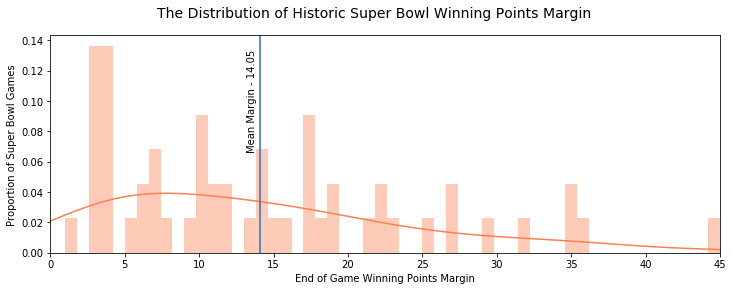

In [8]:
max_diff = sb_games["PtsMargin"].max()
mean_diff = sb_games["PtsMargin"].mean()
plt.subplots(figsize=(12,4))
plt.suptitle("The Distribution of Historic Super Bowl Winning Points Margin", fontsize=14)
sns.distplot(sb_games["PtsMargin"], color="coral", bins=sb_count).set_xlim(0, max_diff)
plt.axvline(x=mean_diff)
plt.text(mean_diff-0.5, 0.1, f"Mean Margin - {mean_diff:.2f}", ha="center", va="center", rotation="vertical")
plt.xlabel("End of Game Winning Points Margin")
plt.ylabel("Proportion of Super Bowl Games")

* When it comes to the margin of victory of the winning team, the mean margin is 14.05 points, fairly narrow!
* The distribution of the margin is heavily skewed to the left of the mean, peaking around 6-7 points

#### Top 10 Highest and Lowest Winning Margins

Text(0.5, 1.0, 'Top 10 Lowest Winning Margins')

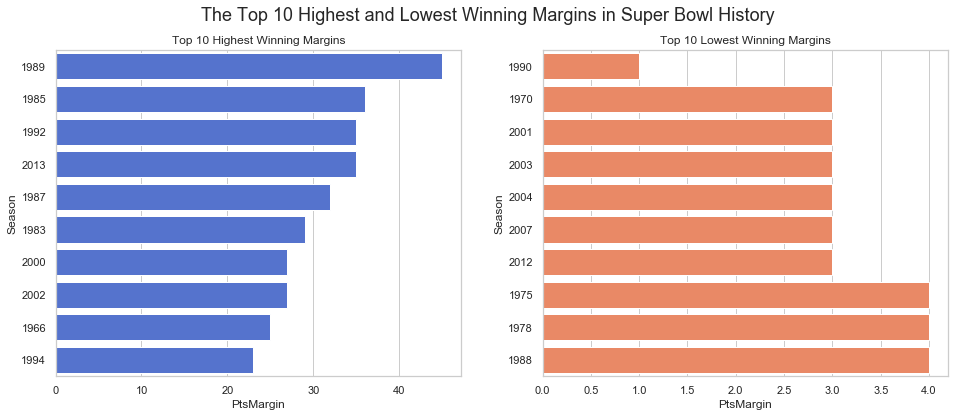

In [60]:
sns.set_style("whitegrid")
high_win_rank = sb_games[["Season", "Winner/tie", "Loser/tie", "PtsMargin"]].nlargest(n=10, columns=["PtsMargin"])
low_win_rank = sb_games[["Season", "Winner/tie", "Loser/tie", "PtsMargin"]].nsmallest(n=10, columns=["PtsMargin"])
fig, ax = plt.subplots(ncols=2, figsize=(16, 6))
plt.suptitle("The Top 10 Highest and Lowest Winning Margins in Super Bowl History", fontsize=18)
sns.barplot(data=high_win_rank, x="PtsMargin", y="Season", order=high_win_rank["Season"], color="royalblue", orient="h", ax=ax[0])
sns.barplot(data=low_win_rank, x="PtsMargin", y="Season", order=low_win_rank["Season"], color="coral", orient="h", ax=ax[1])
ax[0].set_title("Top 10 Highest Winning Margins")
ax[1].set_title("Top 10 Lowest Winning Margins")

* Above we see that the largest winning margin was of 45 points, as seen in 1989
* The margin has been 35pts or greater on three occasions, being 1985 (36), 1992 (35), and 2013 (35)
* The smallest points margin occured in 1990, being of just 1 point
* On 6 occasions (1970, 2001, 2003, 2004, 2007, and 2012) the margin was just 3 points

#### Super Bowl Winning Points Margin Through Time

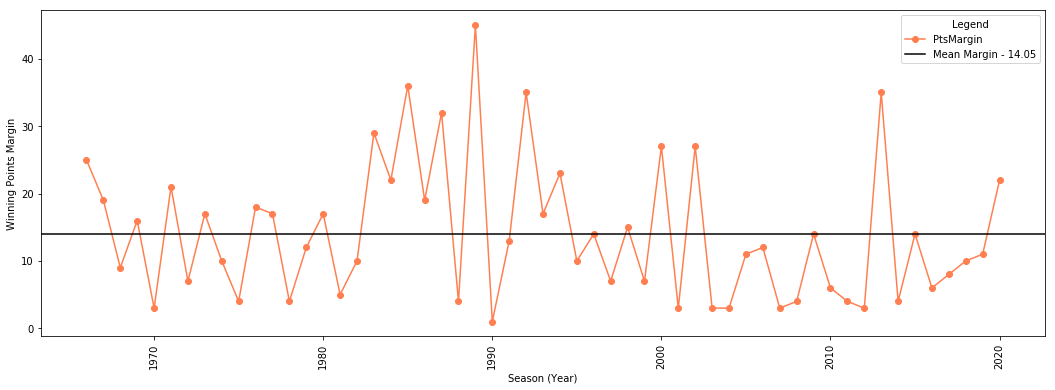

In [10]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(sb_games["Season"], sb_games["PtsMargin"], color="coral", marker="o")
ax.axhline(sb_games["PtsMargin"].mean(), color="black", label=f"Mean Margin - {mean_diff:.2f}")
ax.legend(title="Legend", loc="upper right")
plt.xlabel("Season (Year)")
plt.ylabel("Winning Points Margin")
_ = plt.xticks(rotation=90)

* There is no clear pattern/trend to the winning margin at the Super Bowl through time, however we see a peak through the mid/late 80S and into the early 90s, with the margins often exceeding the mean (14.05pts)
* Throughout the 1970s the Super Bowl appears to have been very competitive, with many games being clearly below the mean margin

### Historic Points Total

#### Total Points Scored Distribution

Text(0, 0.5, 'Proportion of all Super Bowl Games')

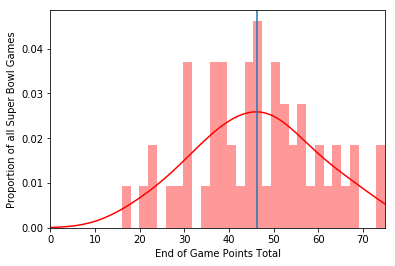

In [11]:
max_pts_total= sb_games["PtsTotal"].max()
sns.distplot(sb_games["PtsTotal"], color="red", bins=30).set_xlim(0, max_pts_total)
plt.axvline(x=sb_games["PtsTotal"].mean())
plt.xlabel("End of Game Points Total")
plt.ylabel("Proportion of all Super Bowl Games")

#### Top Ten Highest and Lowest Scoring Super Bowls

Text(0.5, 1.0, 'Top 10 Lowest Total Scores')

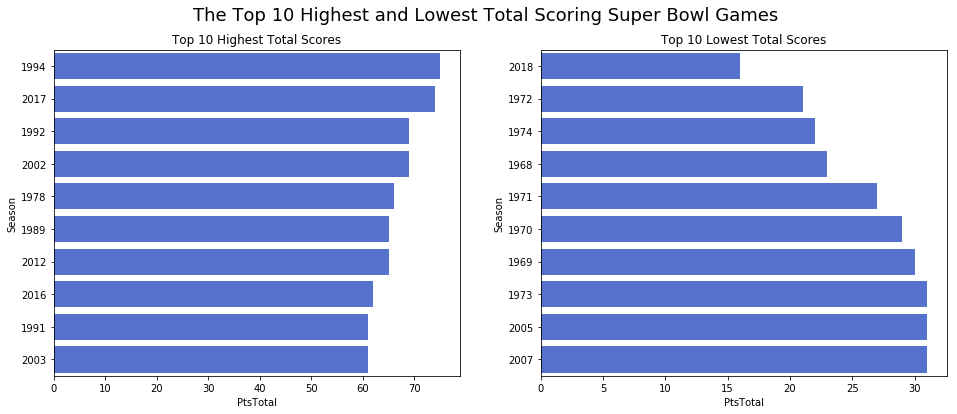

In [12]:
high_total_rank = sb_games[["Season", "Winner/tie", "Loser/tie", "PtsTotal"]].nlargest(n=10, columns=["PtsTotal"])
low_total_rank = sb_games[["Season", "Winner/tie", "Loser/tie", "PtsTotal"]].nsmallest(n=10, columns=["PtsTotal"])
fig, ax = plt.subplots(ncols=2, figsize=(16, 6))
plt.suptitle("The Top 10 Highest and Lowest Total Scoring Super Bowl Games", fontsize=18)
sns.barplot(data=high_total_rank, x="PtsTotal", y="Season", order=high_total_rank["Season"], color="royalblue", orient="h", ax=ax[0])
sns.barplot(data=low_total_rank, x="PtsTotal", y="Season", order=low_total_rank["Season"], color="royalblue", orient="h", ax=ax[1])
ax[0].set_title("Top 10 Highest Total Scores")
ax[1].set_title("Top 10 Lowest Total Scores")

#### Total Points Scored Through Time

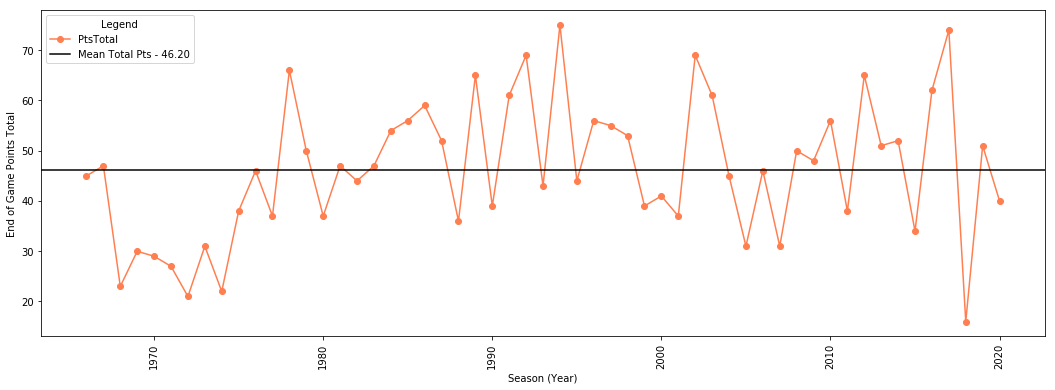

In [13]:
mean_total = sb_games["PtsTotal"].mean()
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(sb_games["Season"], sb_games["PtsTotal"], color="coral", marker="o")
plt.axhline(mean_total, color="black", label=f"Mean Total Pts - {mean_total:.2f}")
ax.legend(title="Legend")
plt.xlabel("Season (Year)")
plt.ylabel("End of Game Points Total")
_ = plt.xticks(rotation=90)

In [14]:
import statsmodels.api as sm
results = sm.OLS(sb_games["PtsTotal"], sb_games["Season"]).fit()
if results.pvalues[0] < 0.05:
    print("The Season and the TotalPoints have a statistically significant relationship.")
print(f"Proportion of variance explained: {results.rsquared:.3f}")

/Users/alessiomorteo/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


The Season and the TotalPoints have a statistically significant relationship.
Proportion of variance explained: 0.920


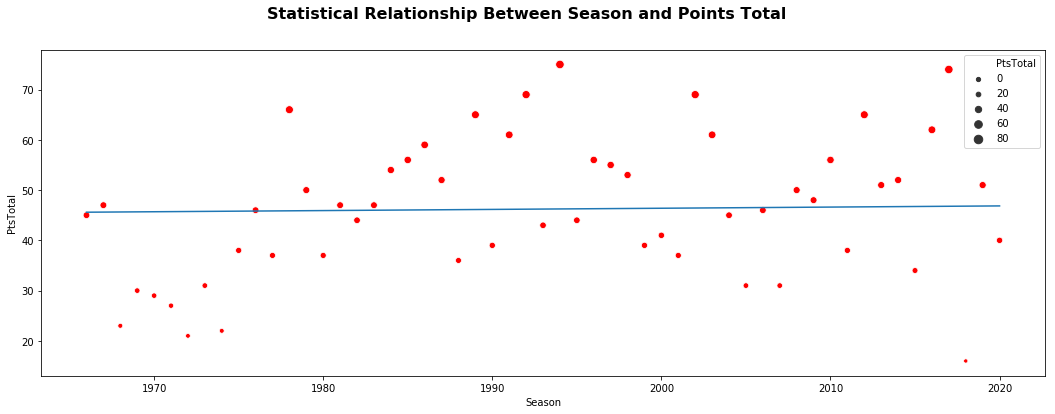

In [15]:
plt.subplots(figsize=(18,6))
plt.suptitle("Statistical Relationship Between Season and Points Total", fontweight="bold", fontsize=16)
sns.scatterplot(sb_games["Season"], sb_games["PtsTotal"], size=sb_games["PtsTotal"], color="red")
sns.lineplot(sb_games["Season"], results.fittedvalues)

## Historic Yards Gained at SuperBowl

### Total Yards Gained

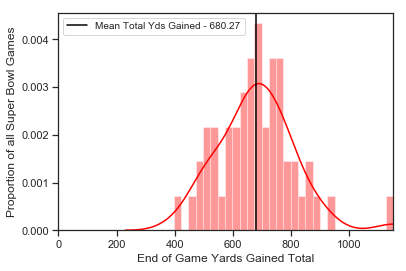

In [55]:
max_yds_total= sb_games["YdsTotal"].max()
sns.distplot(sb_games["YdsTotal"], color="red", bins=30).set_xlim(0, max_yds_total)
plt.axvline(x=sb_games["YdsTotal"].mean(), color="black",
            label=f"Mean Total Yds Gained - {sb_games['YdsTotal'].mean():.2f}")
plt.xlabel("End of Game Yards Gained Total")
plt.ylabel("Proportion of all Super Bowl Games")
plt.legend(fontsize=10)

* The winning team gains on average 680.27yds
* The yards gained by the winning team have vary drastically (as seen above)

### Winner Net Yards

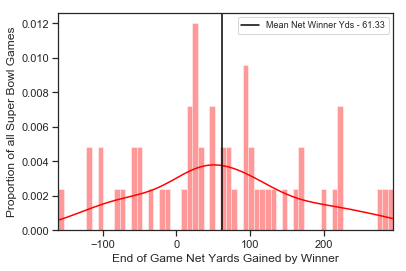

In [53]:
sb_games["NetYdsWinner"] = sb_games["YdsW"] - sb_games["YdsL"]
net_yds_winner_low, net_yds_winner_high = sb_games["NetYdsWinner"].min(), sb_games["NetYdsWinner"].max()
sns.distplot(sb_games["NetYdsWinner"], color="red", bins=60).set_xlim(net_yds_winner_low, net_yds_winner_high)
plt.axvline(x=sb_games["NetYdsWinner"].mean(), color="black",
            label=f"Mean Net Winner Yds - {sb_games['NetYdsWinner'].mean():.2f}")
plt.xlabel("End of Game Net Yards Gained by Winner")
plt.ylabel("Proportion of all Super Bowl Games")
plt.legend(fontsize=9)

* We see that generally, the winning team has gained more yards than their opposition has.
* On average the winning team has a net yardage of 61.33

### Super Bowl Team Records

In [46]:
sb_winners = sb_games["Winner/tie"].tolist()
sb_losers = sb_games["Loser/tie"].tolist()
unique_teams = list(set(sb_winners + sb_losers))
print(f"In Super Bowl History, the total number of teams that have played is: {len(unique_teams)}")
print(f"These are: {unique_teams}")

In Super Bowl History, the total number of teams that have played is: 31
These are: ['New York Jets', 'Oakland Raiders', 'Indianapolis Colts', 'San Diego Chargers', 'Buffalo Bills', 'San Francisco 49ers', 'Tampa Bay Buccaneers', 'St. Louis Rams', 'Dallas Cowboys', 'Baltimore Ravens', 'New England Patriots', 'Pittsburgh Steelers', 'Arizona Cardinals', 'Chicago Bears', 'Atlanta Falcons', 'Washington Redskins', 'Tennessee Titans', 'Los Angeles Rams', 'New Orleans Saints', 'New York Giants', 'Kansas City Chiefs', 'Green Bay Packers', 'Seattle Seahawks', 'Minnesota Vikings', 'Carolina Panthers', 'Miami Dolphins', 'Baltimore Colts', 'Denver Broncos', 'Los Angeles Raiders', 'Cincinnati Bengals', 'Philadelphia Eagles']


In [19]:
# Generate a Summary of Super Bowl Outcomes
winners_count = Counter(sb_winners) # count team wins
losers_count = Counter(sb_losers) # count team losses
    
sb_team_outcomes = pd.DataFrame(winners_count, index=[0]).T # convert to dataframe
sb_team_outcomes = pd.merge(sb_team_outcomes, pd.DataFrame(losers_count, index=[0]).T,
                                         how="outer",
                                         left_index=True,
                                         right_index=True
                                         ).fillna(0) # join win and loss records together, infill 0
sb_team_outcomes = sb_team_outcomes.reset_index()
sb_team_outcomes.columns = ["Team", "Won", "Lost"] # set col names
sb_team_outcomes[["Won", "Lost"]] = sb_team_outcomes[["Won", "Lost"]].astype(int)
sb_team_outcomes["Apps"] = sb_team_outcomes["Won"] + sb_team_outcomes[ "Lost"] # total apps
sb_team_outcomes["Win%"] = sb_team_outcomes["Won"] / sb_team_outcomes["Apps"] * 100 # win percentage
sb_team_outcomes = sb_team_outcomes.sort_values(by="Won", ascending=False) # sort table


#### Overall Record Overview

In [20]:
melted_sb = sb_team_outcomes.melt("Team", var_name="Metric", value_name="Value") # melting of variable into one column

Text(0, 0.5, 'Metric Value')

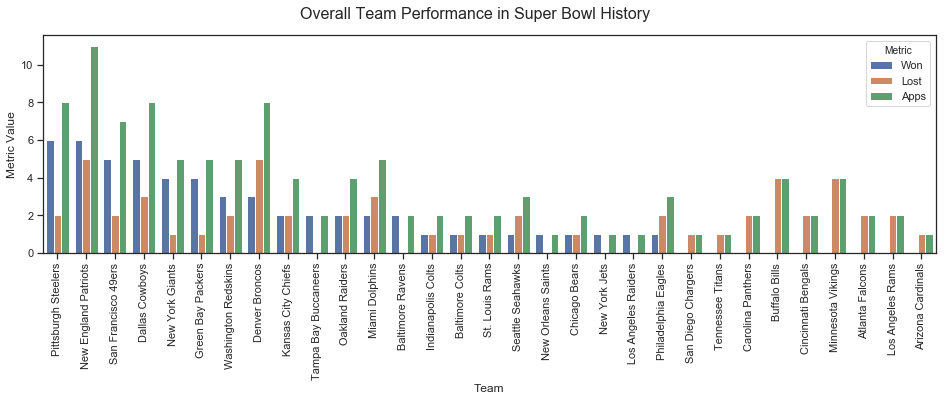

In [42]:
fig, ax = plt.subplots(figsize=(16,4))
plt.suptitle("Overall Team Performance in Super Bowl History", fontsize=16)
sns.barplot(data=melted_sb[melted_sb["Metric"] != "Win%"], x="Team", y="Value", hue="Metric")
plt.xticks(rotation=90)
plt.xlabel("Team")
plt.ylabel("Metric Value")

#### Win Percentage

Text(0, 0.5, 'Historic Win Percentage')

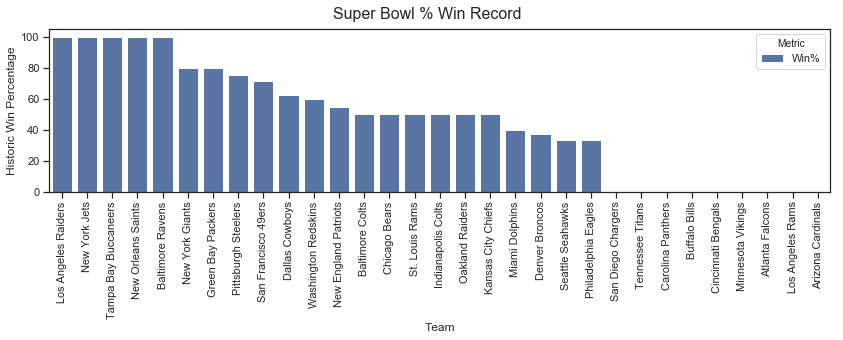

In [37]:
fig, ax = plt.subplots(figsize=(14,3))
plt.suptitle(r"Super Bowl % Win Record", fontsize=16)
sns.barplot(data=melted_sb[melted_sb["Metric"] == "Win%"].sort_values(by="Value", ascending=False),
            x="Team", y="Value", hue="Metric")
plt.xticks(rotation=90)
plt.xlabel("Team")
plt.ylabel("Historic Win Percentage")

* Five Teams have a perfect Super Bowl record, being the Los Angeles Raiders, the New York Jets, the Tampa Bay Buccaneers, the New Orleans Saints, and the Baltimore Ravens
* Despite the high number of wins, the New England Patriots have a win record of just 54.55% (6:5)
* Conversely the Pittsburgh Steelers have a win record of 75% (6:2)

#### Super Bowl Wins and Appearances

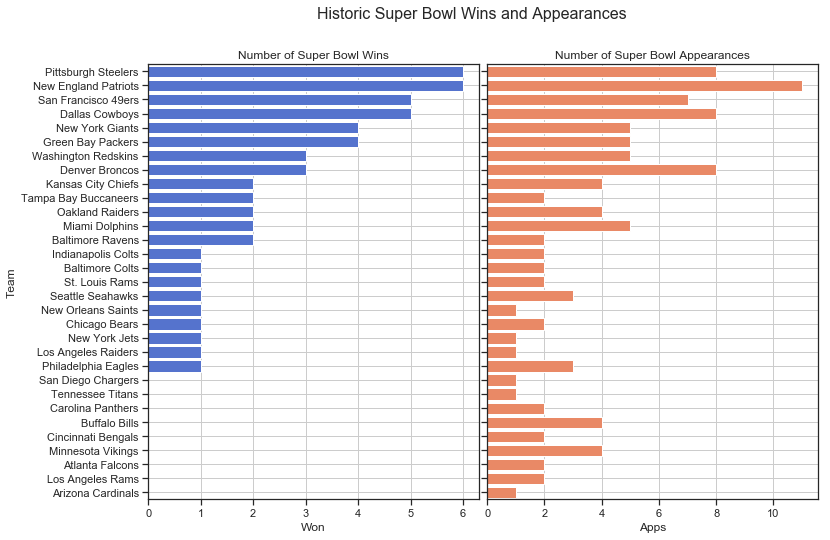

In [35]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 8))
plt.suptitle("Historic Super Bowl Wins and Appearances", fontsize=16)
sns.barplot(data=sb_team_outcomes, x="Won", y="Team", color="royalblue", orient="h", ax=ax[0])
sns.barplot(data=sb_team_outcomes, x="Apps", y="Team", color="coral", orient="h", ax=ax[1])
ax[0].grid()
ax[1].grid()
ax[1].set(yticklabels=[], ylabel=None)  # remove the tick labels
ax[0].set_title("Number of Super Bowl Wins")
ax[1].set_title("Number of Super Bowl Appearances")
plt.subplots_adjust(wspace=0.025, hspace=0)

* We can see the Pittsburgh Steelers and the New England Patriots have the most Super Bow victories, tied for 6
* Whilst the Steelers, Dallas Cowboys and the Denver Broncos are all tied for the 2nd highest Super Bowl Presence, the Patriots are top with a staggering 11 appearances!
* The San Franciso 49ers and Green Bay Packers are tied for second, with 5 SB wins each
* The San Diego Chargers, Tennessee Titans, Carolina Panthers, Buffalo Bills, Cincinnati Bengals, Minnesota Vikings, Atlanta Falcons, Los Angeles Rams, and Arizona Cardinals all have been to the Super Bowl, but never won. Between them they have 19 unsuccesful appearances.
* The Buffalo Bills and Minesota Vikings each have 4 SB appearances, but 0 victories, therefore they have the worst Super Bowl record